In [1]:
import numpy as np
import pandas as pan
import matplotlib.pyplot as mat
import sklearn as sky

In [7]:
from sklearn.datasets import load_digits
digits=load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [10]:
ds=pan.DataFrame(digits.data)
ds.head()


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [11]:
ds['target']=digits.target


In [12]:
x=ds.drop(['target'],axis=1)
y=ds.target
x,y

(       0    1     2     3     4     5    6    7    8    9   ...   54   55  \
 0     0.0  0.0   5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
 1     0.0  0.0   0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
 2     0.0  0.0   0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0   
 3     0.0  0.0   7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0   
 4     0.0  0.0   0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
 ...   ...  ...   ...   ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
 1792  0.0  0.0   4.0  10.0  13.0   6.0  0.0  0.0  0.0  1.0  ...  4.0  0.0   
 1793  0.0  0.0   6.0  16.0  13.0  11.0  1.0  0.0  0.0  0.0  ...  1.0  0.0   
 1794  0.0  0.0   1.0  11.0  15.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
 1795  0.0  0.0   2.0  10.0   7.0   0.0  0.0  0.0  0.0  0.0  ...  2.0  0.0   
 1796  0.0  0.0  10.0  14.0   8.0   1.0  0.0  0.0  0.0  2.0  ...  8.0  0.0   
 
        56   57   58    59    60    61   62   63  
 0     0.0 

In [13]:
from random import random
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=10)

In [14]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=20)
RF.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=20)

In [15]:
ypred=RF.predict(xtest)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ypred,ytest)
cm

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  1,  0,  1,  0],
       [ 0,  1, 45,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 46,  0,  0,  0,  0,  0,  2],
       [ 0,  0,  0,  0, 38,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0, 41,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 46,  0,  2,  0],
       [ 0,  0,  0,  0,  2,  0,  0, 46,  0,  4],
       [ 1,  0,  0,  1,  0,  0,  0,  0, 40,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 42]], dtype=int64)

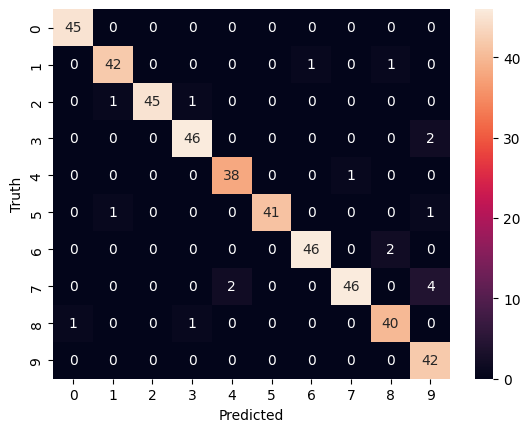

In [18]:
import seaborn as sea
sea.heatmap(cm,annot=True)
mat.xlabel('Predicted')
mat.ylabel('Truth')
mat.show()

In [19]:
from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier(n_neighbors=4)
KN.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=4)

In [20]:
ypredk=KN.predict(xtest)
cmk=confusion_matrix(ypredk,ytest)
cmk

array([[46,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 45,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 48,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 39,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 40,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 47,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 47,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0, 41,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 47]], dtype=int64)

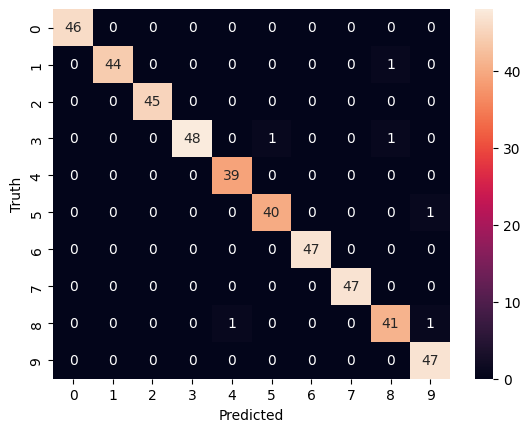

In [21]:
sea.heatmap(cmk,annot=True)
mat.xlabel('Predicted')
mat.ylabel('Truth')
mat.show()

In [23]:
from sklearn.metrics import accuracy_score
m=accuracy_score(ypred,ytest)
n=accuracy_score(ypredk,ytest)
m,n

(0.9577777777777777, 0.9866666666666667)